# Digits Data Set

# 1. 필요한 모듈 import 하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn

print(sklearn.__version__)

1.0


# 2. 데이터 준비

In [2]:
# 내장 digits 데이터 불러오기
digits = load_digits()

# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


# 3. 데이터 이해하기

In [3]:
# 데이터셋에 담긴 정보 종류 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# keys에서 확인한 정보 중 data를 저장
digits_data = digits.data
print(digits_data.shape)

(1797, 64)


ㄴ digits_data는 1797개의 레코드와 64개의 이미지 픽셀로 구성

In [5]:
# 첫 번째 데이터 확인
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

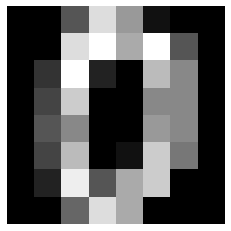

In [6]:
# 이미지로 확인
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [7]:
# digits 데이터의 타겟(레이블)값을 저장
digits_label = digits.target

print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [8]:
# digits 데이터의 전체 레이블 확인
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
# digits 데이터의 description 확인
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [10]:
# digits 데이터의 피쳐 이름 확인 - digits 데이터의 피쳐는 픽셀이므로 굳이 확인하지 않는다.
# digits.feature_names

In [11]:
# digits 데이터셋은 filename 이 없다.
# digits.filename

# 4. train, test 데이터 분리

In [12]:
import pandas as pd

In [13]:
type(digits_data)

numpy.ndarray

In [14]:
# train, test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [15]:
# label이 잘 분리되었는지 확인
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

# 5. 다양한 모델로 학습시켜 보기 및 평가

#### 5-1. Decision Tree 사용해 보기

In [16]:
from sklearn.tree import DecisionTreeClassifier 

# DecisionTreeClassifier 인스턴트 생성
decision_tree = DecisionTreeClassifier(random_state=32) 

# 학습
decision_tree.fit(X_train, y_train)

# 예측
y_pred = decision_tree.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



#### Decision Tree 모델 평가
1. digits 데이터의 픽셀을 보고 숫자를 예측하여 분류하므로 accuracy 를 가지고 모델 성능을 평가하는 것이 적절하다.


2. 위 결과 보고서와 같이 Decision Tree 모델의 accuracy 는 0.86 의 예측성능을 나타낸다.

#### 5-2. Random Forest 사용해 보기

In [17]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 인스턴트 생성
random_forest = RandomForestClassifier(random_state=32) 

# 학습
random_forest.fit(X_train, y_train)

# 예측
y_pred = random_forest.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



#### Random Forest 모델 평가
1. digits 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 Random Forest 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 Random Forest 모델의 accuracy 는 0.96 의 예측성능을 나타낸다.

#### 5-3. SVM 사용해 보기

In [18]:
from sklearn import svm

# svm.SVC() 인스턴트 생성
svm_model = svm.SVC()

# 학습
svm_model.fit(X_train, y_train)

# 예측
y_pred = svm_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### SVM 모델 평가
1. digits 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 SVM 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 SVM 모델의 accuracy 는 0.99 의 예측성능을 나타낸다.


3. SVM 의 성능으로 보았을 때 digits 데이터가 선형적으로 잘 구분할 수 있다는 점이 인상에 남는다.

#### 5-4. Stochastic Gradient Descent Classifier 사용해 보기

In [19]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier() 인스턴트 생성
sgd_model = SGDClassifier()

# 학습
sgd_model.fit(X_train, y_train)

# 예측
y_pred = sgd_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.84      0.98      0.90        42
           2       1.00      1.00      1.00        40
           3       0.94      0.91      0.93        34
           4       1.00      0.97      0.99        37
           5       0.80      1.00      0.89        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.95      0.86      0.90        43
           9       1.00      0.78      0.88        32

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



#### SGD 모델 평가
1. digits 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 SGD 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 SGD 모델의 accuracy 는 0.94 의 예측성능을 나타낸다(실행할 때마다 결과가 다르게 나오지만 일부로 random_state 를 설정하지 않음).


3. SGD 모델은 랜덤 프로세스로 인해 시행할 때마다 결과의 편차가 크게 나온다.

#### 5-5. Logistic Regression 사용해 보기

In [20]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression() 인스턴트 생성
logistic_model = LogisticRegression()

# 학습
logistic_model.fit(X_train, y_train)

# 예측
y_pred = logistic_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression 모델 평가
1. digits 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 Logistic Regression 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 Logistic Regression 모델의 accuracy 는 0.95 의 예측성능을 나타낸다.

# Wine Data Set

# 1. 필요한 모듈 import 하기

In [21]:
from sklearn.datasets import load_wine

# 2. 데이터 준비

In [22]:
# 내장 wine 데이터 불러오기
wine = load_wine()

# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


# 3. 데이터 이해하기

In [23]:
# 데이터셋에 담긴 정보 종류 확인
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [24]:
# keys에서 확인한 정보 중 data를 저장
wine_data = wine.data
print(wine_data.shape)

(178, 13)


ㄴ wine_data는 178개의 레코드와 13개의 피쳐로 구성

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash  
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

In [25]:
# 데이터 확인
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [26]:
# wine 데이터의 타겟(레이블)값을 저장
wine_label = wine.target

print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [27]:
# wine 데이터의 전체 레이블 확인
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [28]:
# wine 데이터의 description 확인
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [29]:
# wine 데이터의 피쳐 이름 확인
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [30]:
# wine 데이터셋은 filename 이 없다.
# wine.filename

# 4. train, test 데이터 분리

In [31]:
import pandas as pd

In [32]:
type(wine_data)

numpy.ndarray

In [33]:
# train, test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

In [34]:
# label이 잘 분리되었는지 확인
y_train, y_test

(array([2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,
        0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
        1, 1, 0, 2, 1, 1, 2, 1, 0, 2]),
 array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1]))

# 5. 다양한 모델로 학습시켜 보기 및 평가

#### 5-1. Decision Tree 사용해 보기

In [35]:
from sklearn.tree import DecisionTreeClassifier 

# DecisionTreeClassifier 인스턴트 생성
decision_tree = DecisionTreeClassifier(random_state=32) 

# 학습
decision_tree.fit(X_train, y_train)

# 예측
y_pred = decision_tree.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### Decision Tree 모델 평가
1. wine 데이터셋은 13가지 피쳐를 학습하여 3종류의 와인으로 분류하는 테스크에 사용하므로, accuracy 를 가지고 분류 성능을 평가하는 것이 적절하다.


2. 위 결과 보고서와 같이 Decision Tree 모델의 accuracy 는 0.94 의 예측성능을 나타낸다.

#### 5-2. Random Forest 사용해 보기

In [36]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 인스턴트 생성
random_forest = RandomForestClassifier(random_state=32) 

# 학습
random_forest.fit(X_train, y_train)

# 예측
y_pred = random_forest.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### Random Forest 모델 평가
1. wine 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 Random Forest 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 Random Forest 모델의 accuracy 는 1.00 의 예측성능을 나타낸다.

#### 5-3. SVM 사용해 보기

In [37]:
from sklearn import svm

# svm.SVC() 인스턴트 생성
svm_model = svm.SVC()

# 학습
svm_model.fit(X_train, y_train)

# 예측
y_pred = svm_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### SVM 모델 평가
1. wine 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 SVM 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 SVM 모델의 accuracy 는 0.61 의 예측성능을 나타낸다.

### 문제해결 회고

- 선형 SVM 성능이 트리 기반 모델보다 낮은 것은 데이터가 비선형 패턴을 보이는 것으로 생각할 수 있다. 따라서 SVM 의 커널 인자를 추가하여 비선형 모델링을 시도하기로 한다.

In [38]:
# 커널을 활용한 SVM 사용을 위해 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 1. Gaussian Radial Basis Function (RBF) kernel 을 사용한 비선형 분류 모델 생성
svm_model = svm.SVC(kernel='rbf')

# 2. 탐색할 하이퍼파라미터 생성
param_grid = {'C': [0.1, 1, 10, 100],  # Regularization parameter
              'gamma': [0.001, 0.01, 0.1, 1, 10]}  # Kernel coefficient

# 3. GridSearchCV 수행
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 4. 최적의 하이퍼파라미터 저장
best_hp = grid_search.best_params_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 100, 'gamma': 0.001}


In [39]:
# 5. 최적의 파라미터로 모델 생성
svm_model = svm.SVC(kernel='rbf', C=100, gamma=0.001)

# 6. 학습
svm_model.fit(X_train, y_train)

# 7. 예측
y_pred = svm_model.predict(X_test)

# 8. 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.67      0.82      0.74        17
           2       0.71      0.42      0.53        12

    accuracy                           0.69        36
   macro avg       0.71      0.70      0.69        36
weighted avg       0.70      0.69      0.68        36



#### 결과
- rbf 커널과 하이퍼파라미터 튜닝을 적용한 SVM 모델의 경우 이전보다 정확도가 0.61에서 0.69로 향상되었다.


- 일반적으로 분류 테스크에서 SVM 이 좋은 성능을 나타내는 것을 경험했지만 wine 데이터셋에 대해서는 성능이 비교적 낮았다.


- 비선형 모델링을 해도 성능이 크게 좋아지지 않았는데, 추후 그 이유에 대해 깊게 공부해 보고자 한다.

#### 5-4. Stochastic Gradient Descent Classifier 사용해 보기

In [40]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier() 인스턴트 생성
sgd_model = SGDClassifier()

# 학습
sgd_model.fit(X_train, y_train)

# 예측
y_pred = sgd_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         7
           1       0.68      0.88      0.77        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.39      0.63      0.48        36
weighted avg       0.42      0.61      0.49        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SGD 모델 평가
1. wine 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 SGD 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 SGD 모델의 accuracy 는 0.67 의 예측성능을 나타낸다.


3. SGD 모델은 랜덤 프로세스로 인해 시행할 때마다 결과의 편차가 크게 나온다.

#### 5-5. Logistic Regression 사용해 보기

In [41]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression() 인스턴트 생성
logistic_model = LogisticRegression()

# 학습
logistic_model.fit(X_train, y_train)

# 예측
y_pred = logistic_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression 모델 평가
1. wine 데이터에 대하여 수행하는 분류 테스크는 일관되기 때문에 Logistic Regression 모델에서도 accuracy 를 평가 지표로 삼는다.


2. 위 결과 보고서와 같이 Logistic Regression 모델의 accuracy 는 0.97 의 예측성능을 나타낸다.

# Breast Cancer Data Set

# 1. 필요한 모듈 import 하기

In [42]:
from sklearn.datasets import load_breast_cancer

# 2. 데이터 준비

In [43]:
# 내장 breast_cancer 데이터 불러오기
breast_cancer = load_breast_cancer()

# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함
print(dir(breast_cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


# 3. 데이터 이해하기

In [44]:
# 데이터셋에 담긴 정보 종류 확인
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
# keys에서 확인한 정보 중 data를 저장
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)

(569, 30)


In [46]:
# breast_cancer 데이터의 description 확인
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### ㄴ 해석
- breast_cancer_data는 569개의 레코드와 30개의 피쳐로 구성


- 각 피쳐는 유방 종양의 디지털 이미지를 통해 계산된 수치이며, 이는 세포 핵의 특성을 설명하는 데이터로 활용할 수 있다. 
 - radius (mean of distances from center to points on the perimeter)
 - texture (standard deviation of gray-scale values)
 - perimeter
 - area
 - smoothness (local variation in radius lengths)
 - compactness (perimeter^2 / area - 1.0)
 - concavity (severity of concave portions of the contour)
 - concave points (number of concave portions of the contour)
 - symmetry
 - fractal dimension ("coastline approximation" - 1)
 
 
- 타겟 컬럼은  Malignant(악성 종양, '0', 212개), Benign(양성 종양, '1', 357개) 로 구성되어 있다.

In [47]:
# 데이터 확인
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
# breast_cancer 데이터의 전체 레이블명 확인
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [49]:
# breast_cancer 데이터의 타겟(레이블)값을 저장
breast_cancer_label = breast_cancer.target

print(breast_cancer_label.shape)
print(breast_cancer_label.sum())
breast_cancer_label

(569,)
357


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### ㄴ합계를 내면 357 이 나오는데 데이터 description 에 따르면 Benign 클래스가 357 개로 나오므로, 
#### Benign이 1, Malignant이 0으로 레이블링 되어 있음을 확인할 수 있다.

## 문제해결 회고.
1. breast cancer 데이터셋 활용목표를 악성(Malignant) 종양을 잘 예측하는 테스크로 정한다.
2. Malignant 를 1로, Benign(양성 종양)을 0으로 레이블을 변경하여 예측 테스크를 수행하기로 한다.

In [50]:
import numpy as np
# 1. np.where 를 활용하여 0 인 레이블을 1로, 1 인 레이블을 0 으로 수정한다.
# 첫번째 인자에 조건, 두번째 인자에 바꿀 값, 세번째 인자에 조건에 맞지 않는 경우 바꿀 값
breast_cancer_label = np.where(breast_cancer_label == 0, 1, 0)

# 2. 잘 수정되었다면 sum 값이 Malignant 의 개수인 212 만큼 나와야 한다.
breast_cancer_label.sum()

212

In [51]:
# breast_cancer 데이터의 피쳐 이름 확인
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [52]:
# breast_cancer 데이터셋의 filename
breast_cancer.filename

'breast_cancer.csv'

# 4. train, test 데이터 분리

In [53]:
import pandas as pd

In [54]:
type(breast_cancer_data)

numpy.ndarray

In [55]:
# train, test 셋 분리
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [56]:
# label이 잘 분리되었는지 확인
y_train, y_test

(array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 

# 5. 다양한 모델로 학습시켜 보기 및 평가

### 문제해결 회고 : Breast Cancer 데이터셋 모델 평가 지표 설정
1. 종양이 악성인지 양성인지 진단하는 테스크를 수행하기 때문에 거짓 음성 비율(FNR)을 줄이는 것이 중요한 모델링 기준이 된다.
2. 앞써 악성 종양인 경우를 1로, 양성 종양인 경우 0으로 레이블을 수정했기 때문에 재현율(recall)을 모델 평기 지표로 선정하는 것이 의료진단 테스크를 수행하는데 적절하다.
3. 따라서 recall 값을 기준으로 모델을 평가하도록 한다.

#### 5-1. Decision Tree 사용해 보기

In [57]:
from sklearn.tree import DecisionTreeClassifier 

# DecisionTreeClassifier 인스턴트 생성
decision_tree = DecisionTreeClassifier(random_state=32) 

# 학습
decision_tree.fit(X_train, y_train)

# 예측
y_pred = decision_tree.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        74
           1       0.92      0.82      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



#### Decision Tree 모델 평가
1. 위 결과 보고서와 같이 Decision Tree 모델의 y = 1 에 대한 recall 성능은 0.82 로 나타난다.

#### 5-2. Random Forest 사용해 보기

In [58]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 인스턴트 생성
random_forest = RandomForestClassifier(random_state=32) 

# 학습
random_forest.fit(X_train, y_train)

# 예측
y_pred = random_forest.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.95      0.97        40

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Random Forest 모델 평가
1. 위 결과 보고서와 같이 Random Forest 모델의 y = 1 에 대한 recall 성능은 0.95 로 나타난다.

#### 5-3. SVM 사용해 보기

In [59]:
from sklearn import svm

# svm.SVC() 인스턴트 생성
svm_model = svm.SVC()

# 학습
svm_model.fit(X_train, y_train)

# 예측
y_pred = svm_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        74
           1       1.00      0.72      0.84        40

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



#### SVM 모델 평가
1. 위 결과 보고서와 같이 SVM 모델의 y = 1 에 대한 recall 성능은 0.72 로 나타난다.

#### 비선형 SVM 활용

In [60]:
# 커널을 활용한 SVM 사용을 위해 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 1. Gaussian Radial Basis Function (RBF) kernel 을 사용한 비선형 분류 모델 생성
svm_model = svm.SVC(kernel='rbf')

# 2. 탐색할 하이퍼파라미터 생성
param_grid = {'C': [0.1, 1, 10, 100],  # Regularization parameter
              'gamma': [0.001, 0.01, 0.1, 1, 10]}  # Kernel coefficient

# 3. GridSearchCV 수행
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 4. 최적의 하이퍼파라미터 저장
best_hp = grid_search.best_params_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'gamma': 0.001}


In [61]:
# 5. 최적의 파라미터로 모델 생성
svm_model = svm.SVC(kernel='rbf', C=best_hp['C'], gamma=best_hp['gamma'])

# 6. 학습
svm_model.fit(X_train, y_train)

# 7. 예측
y_pred = svm_model.predict(X_test)

# 8. 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.90      0.93      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



#### 비선형 SVM 모델 평가
1. 위 결과 보고서와 같이 비선형 SVM 모델의 y = 1 에 대한 recall 성능은 0.93 으로, 이전 선형 SVM 의 0.72 보다 향상된 성능을 보인다.

#### 5-4. Stochastic Gradient Descent Classifier 사용해 보기

In [62]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier() 인스턴트 생성
sgd_model = SGDClassifier()

# 학습
sgd_model.fit(X_train, y_train)

# 예측
y_pred = sgd_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        74
           1       1.00      0.62      0.77        40

    accuracy                           0.87       114
   macro avg       0.92      0.81      0.84       114
weighted avg       0.89      0.87      0.86       114



#### SGD 모델 평가
1. 위 결과 보고서와 같이 SGD 모델의 y = 1 에 대한 recall 성능은 0.40 로 가장 낮은 성능을 보였다.
2. SGD 모델은 랜덤 프로세스로 인해 시행할 때마다 결과의 편차가 크게 나온다.

#### 5-5. Logistic Regression 사용해 보기

In [63]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression() 인스턴트 생성
logistic_model = LogisticRegression()

# 학습
logistic_model.fit(X_train, y_train)

# 예측
y_pred = logistic_model.predict(X_test)

# 평가 지표 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        74
           1       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Logistic Regression 모델 평가
1. 위 결과 보고서와 같이  Logistic Regression 모델의 y = 1 에 대한 recall 성능은 0.82 로 나타난다.

# 6. 선형 모델을 통해 해석해보기

: 로지스틱 회귀 모델을 breast cancer 데이터에 fitting 하여 표본 내 평가 형식으로 독립변수와 종속변수 사이의 상관관계를 분석해본다.

#### 6-1. 로지스틱 회귀를 통한 독립변수, 종속변수 관계 설명

In [64]:
# 1. 데이터를 0 ~ 1 사이의 값을 가지도록 정규화
from sklearn.preprocessing import MinMaxScaler

# 2. 정규화 과정 함수화
def normalize_dataframe(df):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(df)
    normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
    return normalized_df

# 3. 표본 내 모델 생성을 위한 데이터 준비 - split 하기 전 전체 데이터를 사용한다.
X = pd.DataFrame(breast_cancer_data, columns=breast_cancer.feature_names)

# 4. breast cancer dataframe(X) 정규화
normalized_X = normalize_dataframe(X)
normalized_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [65]:
# 1. 표본 내 모델 생성을 위한 데이터 준비
y = breast_cancer_label

# 2. 라이브러리 호출
import statsmodels.api as sm

# 3. statsmodels 의 GLM 함수를 통해 로지스틱 회귀 결과 보고서 출력
logit_reg_sm = sm.GLM(y, normalized_X.assign(const=1),
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  569
Model:                            GLM   Df Residuals:                      538
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 20 Feb 2024   Deviance:                       921.03
Time:                        08:42:00   Pearson chi2:                 4.50e+16
No. Iterations:                    33   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
mean radius             -8

/opt/conda/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/conda/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/opt/conda/lib/python3.9/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


#### 해석 및 작은 회고
1. 30개 피쳐의 회귀계수에 대한 p값이 모두 0 에 근사함을 확인할 수 있다.
2. 독립변수 간의 회귀계수 값의 차이는 매우 크게 나타난다.
3. 해당 독립변수가 한 단위 증가할 때 Y=1 일 확률과 아닌 확률의 비율이 평균적으로 exp(회귀계수)로 나타나는데, 회귀계수 값이 매우 극단적이므로 해석에 어려움이 있다.
4. 정규화를 해서 다시 시도했지만 회귀계수는 여전히 극단적이게 나왔다.
5. 이제 회귀에 대해 더 깊이 있게 공부해야할 시간표가 온 것 같다. 지금까지 배운 것만으로는 데이터를 해석하는데 한계가 있는 것 같다.

#### 6-2. 로지스틱 회귀 편잔차 그래프를 통한 회귀 진단
- 참고 : 데이터 과학을 위한 통계학(https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%205%20-%20Classification.ipynb)

In [66]:
# 1. 편잔차를 그리는 함수에 적용하기 위해 데이터를 전처리한다.
normalized_X['outcome'] = y
normalized_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1


/opt/conda/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


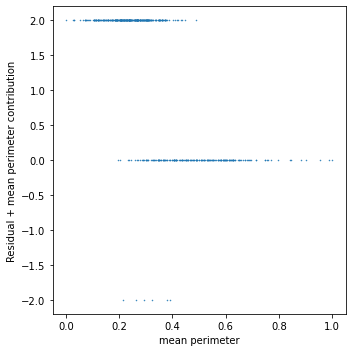

In [67]:
from statsmodels.genmod.generalized_linear_model import GLMResults

# 2. 편잔차 플롯 함수 정의
def partialResidualPlot(model, df, outcome, feature, fig, ax):
    y_actual = df[outcome]
    y_pred = model.predict(df)
    org_params = model.params.copy()
    zero_params = model.params.copy()
    
    # set model parametes of other features to 0
    for i, name in enumerate(zero_params.index):
        if feature in name:
            continue
        zero_params[i] = 0.0
    model.initialize(model.model, zero_params)
    feature_prediction = model.predict(df)
    ypartial = -np.log(1/feature_prediction - 1)
    ypartial = ypartial - np.mean(ypartial)
    model.initialize(model.model, org_params)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': -2 * (y_actual - y_pred),
        'ypartial': ypartial/ 2,
    })
    results = results.sort_values(by=['feature'])

    ax.scatter(results.feature, results.residual, marker=".", s=72./fig.dpi)
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

# 3. 시각화 - 독립변수 하나를 인자로 받는다. 회귀계수가 가장 큰 mean perimeter 변수를 사용함.
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(logit_result, normalized_X, 'outcome', 'mean perimeter', fig, ax)
# ax.set_xlim(0, 25)
# ax.set_ylim(-2.5, 2.5)


plt.tight_layout()
plt.show()

## 최종 회고
1. 마지막 부분에서 로지스틱 회귀에 대한 편잔차 플롯을 시각화해서 회귀 진단을 시도해 보았다. 그러나 그래프가 생각한 것처럼 나오지 않아 데이터를 정규화해서 다시 시도했는데, y축이 +2 ~ -2 사이의 정상적인 범위가 나오긴 했다. 책과는 다른 그림이 나와 어떻게 해석해야할지 감이 잡히지 않는다. 회귀에 대해 더 깊게 공부해야 할 필요성을 느낀다.


2. 하이퍼파라미터 튜닝을 거친 커널 SVM 을 데이터셋에 적용해 보았다. 와인 데이터셋에서는 약 7% 정도 성능 향상이 있었지만, 유방암 데이터셋에서는 약 20% 의 성능 향상이 있었다. 와인 데이터셋의 경우 다른 비선형 모델의 성능이 좋았는데, 왜 커널 SVM 성능은 높지 않았는지 추후 공부하고 싶은 탐구심이 생겼다.


3. SDG 모델은 그 이름답게 실행할 때마다 결과가 다양하게 나왔다. 일부로 랜덤스태이트을 설정하지는 않았다.


4. 내장 데이터를 사용해서 그런지 데이터에 대한 흥미가 크게 일어나지는 않았다. 그러나 프로젝트의 전체적인 과정을 이해하고 연습하는데 많은 도움이 되었다.


5. 토이 데이터를 통해서는 끌어낼 수 있는 인사이트가 떠오르지는 않았다. 다만 추가적인 여러 시도와 해석을 하면서 나만의 인사이트를 확보해가는 시간이 되었다(회귀 분석을 통한 변수간의 관계 설명과 잔차플롯을 통한 회귀 진단과 해석을 시도함).